# Objective
Create a dataset that contains a random sample of reviews

In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open("data/Video_Games_5.json") as file:
	data = ndjson.load(file)

In [3]:
reviews_df = pd.DataFrame(data)

In [4]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


# Types of Data
- overall: users product rating
- verified: verified purchase on amazon
- reviewTime: when was the review published
- reviewerID: unique identifier of the reviewer
- asin: product id
- reviewerName: username of reviewer
- reviewText: text of review
- summary: summary/headline of review text
- unixReviewTime: when was the review published (unixtime)
- vote: was the review marked as helpful by other users?
- style: different styles available for product (e.g. color)
- image: image attached to the review

In [5]:
reviews_df.shape

(497577, 12)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


<AxesSubplot: xlabel='overall', ylabel='count'>

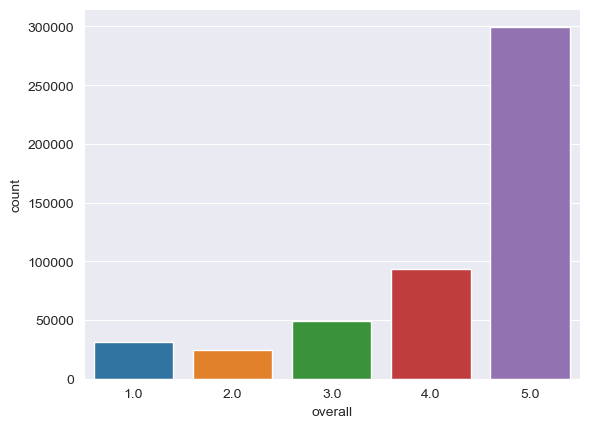

In [7]:
sns.countplot(data=reviews_df, x="overall")

In [8]:
len(reviews_df["asin"].value_counts(dropna=False))

17408

# Undersampling of reviews
As this dataset is quite heavily biased to towards the 5 star reviews this dataset needs to be balanced out

In [9]:
one_1500 = reviews_df[reviews_df["overall"]==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df["overall"]==2.0].sample(n=500)
three_500 = reviews_df[reviews_df["overall"]==3.0].sample(n=500)
four_500 = reviews_df[reviews_df["overall"]==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df["overall"]==5.0].sample(n=1500)

In [10]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [11]:
undersampled_reviews["overall"].value_counts(dropna=False)

1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: overall, dtype: int64

<AxesSubplot: xlabel='overall', ylabel='count'>

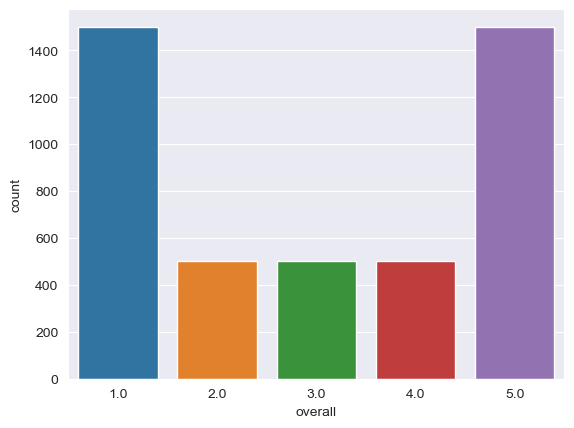

In [12]:
sns.countplot(undersampled_reviews, x="overall")

# Random sample of 100K Reviews

In [13]:
sample_100K_revs = reviews_df.sample(n=100_000, random_state=42)

# Writing corpora

In [14]:
undersampled_reviews.to_csv("data/small_corpus.csv")

In [15]:
sample_100K_revs.to_csv("data/big_corpus.csv")